In [1]:
import numpy as np # linear algebra - is for nerds.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
#read in master dataset
df = pd.read_csv('C:/Users/jgles/dawg/Analysis/CFB_Dataset_PROD.csv')
df

,TS_ID,Team,Season,Conference,NatChamp,Playoff,ConfChamp,Heisman,Games,Win,...,Average.T.O.P,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
0,17,Cincinnati,2013,AAC,0,0,0,0,13,9,...,31:17:00,102,8,13,21,11,17,28,-7,-0.54
1,29,Houston,2013,AAC,0,0,0,0,13,8,...,25:42:00,1,18,25,43,8,10,18,25,1.92
2,42,Louisville,2013,AAC,0,0,0,0,13,12,...,33:49:00,2,11,16,27,6,4,10,17,1.31
3,47,Memphis,2013,AAC,0,0,0,0,12,3,...,30:00:00,107,7,11,18,15,11,26,-8,-0.67
4,76,Rutgers,2013,AAC,0,0,0,0,13,6,...,29:18:00,119,10,8,18,8,22,30,-12,-0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,892,Louisiana,2020,Sun Belt,0,0,0,0,10,9,...,28:03:00,13,6,15,21,5,7,12,9,0.90
966,933,South Alabama,2020,Sun Belt,0,0,0,0,11,4,...,30:22:00,70,7,7,14,9,6,15,-1,-0.09
967,945,Texas St.,2020,Sun Belt,0,0,0,0,12,2,...,25:50:00,82,8,7,15,4,14,18,-3,-0.25
968,948,Troy,2020,Sun Belt,0,0,0,0,11,5,...,26:53:00,93,6,8,14,5,13,18,-4,-0.36


In [3]:
# There are some extra columns that we drop here.

#df = df.drop(['Unnamed: 147',
# 'Unnamed: 148',
# 'Unnamed: 149',
# 'Unnamed: 150',
# 'Unnamed: 151',
# 'Unnamed: 152'],
#       axis = 1)

# Since we are exploring just the 2020 Season, we will filter and keep all the teams from 2020.

is_2020 = df['Season'] == 2020
print(is_2020.head())

df20 = df[is_2020]
df20.head()

0    False
1    False
2    False
3    False
4    False
Name: Season, dtype: bool


,TS_ID,Team,Season,Conference,NatChamp,Playoff,ConfChamp,Heisman,Games,Win,...,Average.T.O.P,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
81,864,Cincinnati,2020,AAC,0,0,1,0,9,9,...,32:04:00,37,4,15,19,9,6,15,4,0.44
82,870,East Carolina,2020,AAC,0,0,0,0,9,3,...,31:05:00,90,8,10,18,12,9,21,-3,-0.33
83,882,Houston,2020,AAC,0,0,0,0,8,3,...,31:18:00,121,3,3,6,6,10,16,-10,-1.25
84,899,Memphis,2020,AAC,0,0,0,0,11,8,...,28:48:00,56,8,12,20,9,10,19,1,0.09
85,908,Navy,2020,AAC,0,0,0,0,10,3,...,30:26:00,76,6,3,9,7,4,11,-2,-0.20


## Avg Rank and Yard Diff Per Play

There are two statistics that we want to derive and track throughout time.

Through the original analysis, the <Average Rank> and **Net Yards Per Play** appeared to be powerful predictive metrics.  We will investigate here whether or not they hold predictive power throughout time.
    
We calculate those stats here.

In [4]:
df = df20
df['Avg Rank']=(df['Off.Rank']+df['Def.Rank'])/2
df['Net Yards Per Play']=df['Off.Yards.Play'] - df['Yards.Play.Allowed']
df['winpct']=df['Win'] / df['Games']
df.head()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,TS_ID,Team,Season,Conference,NatChamp,Playoff,ConfChamp,Heisman,Games,Win,...,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Avg Rank,Net Yards Per Play,winpct
81,864,Cincinnati,2020,AAC,0,0,1,0,9,9,...,15,19,9,6,15,4,0.44,15.0,2.50,1.000000
82,870,East Carolina,2020,AAC,0,0,0,0,9,3,...,10,18,12,9,21,-3,-0.33,79.5,-0.68,0.333333
83,882,Houston,2020,AAC,0,0,0,0,8,3,...,3,6,6,10,16,-10,-1.25,56.0,-0.24,0.375000
84,899,Memphis,2020,AAC,0,0,0,0,11,8,...,12,20,9,10,19,1,0.09,56.0,0.41,0.727273
85,908,Navy,2020,AAC,0,0,0,0,10,3,...,3,9,7,4,11,-2,-0.20,87.5,-1.46,0.300000


In [5]:
list(df)

['TS_ID',
 'Team',
 'Season',
 'Conference',
 'NatChamp',
 'Playoff',
 'ConfChamp',
 'Heisman',
 'Games',
 'Win',
 'Loss',
 'Off.Rank',
 'Off.Plays',
 'Off.Yards',
 'Off.Yards.Play',
 'Off.TDs',
 'Off.Yards.per.Game',
 'Def.Rank',
 'Def.Plays',
 'Yards.Allowed',
 'Yards.Play.Allowed',
 'Off.TDs.Allowed',
 'Total.TDs.Allowed',
 'Yards.Per.Game.Allowed',
 'First.Down.Rank',
 'First.Down.Runs',
 'First.Down.Passes',
 'First.Down.Penalties',
 'First.Downs',
 'First.Down.Def.Rank',
 'Opp.First.Down.Runs',
 'Opp.First.Down.Passes',
 'Opp.First.Down.Penalties',
 'Opp.First.Downs',
 'X4th.Down.Rank',
 'X4th.Attempts',
 'X4th.Conversions',
 'X4th.Percent',
 'X4rd.Down.Def.Rank',
 'Opp.4th.Conversion',
 'Opp.4th.Attempt',
 'Opponent.4th.Percent',
 'Kickoff.Return.Rank',
 'Kickoffs.Returned',
 'Kickoff.Return.Yards',
 'Kickoff.Return.Touchdowns',
 'Avg.Yard.per.Kickoff.Return',
 'Passing.Off.Rank',
 'Pass.Attempts',
 'Pass.Completions',
 'Interceptions.Thrown.x',
 'Pass.Yards',
 'Pass.Yards.Attem

In [6]:
data = df[['TS_ID',
 'Team',
 'Season',
 'Conference',
 'NatChamp',
 'Playoff',
 'ConfChamp',
 'Heisman',
 'Games',
 'Win',
 'Loss',
 'Off.Rank',
 'Off.Plays',
 'Off.Yards',
 'Off.Yards.Play',
 'Off.TDs',
 'Off.Yards.per.Game',
 'Def.Rank',
 'Def.Plays',
 'Yards.Allowed',
 'Yards.Play.Allowed',
 'Off.TDs.Allowed',
 'Total.TDs.Allowed',
 'Yards.Per.Game.Allowed',
 'First.Down.Rank',
 'First.Down.Runs',
 'First.Down.Passes',
 'First.Down.Penalties',
 'First.Downs',
 'First.Down.Def.Rank',
 'Opp.First.Down.Runs',
 'Opp.First.Down.Passes',
 'Opp.First.Down.Penalties',
 'Opp.First.Downs',
 'X4th.Down.Rank',
 'X4th.Attempts',
 'X4th.Conversions',
 'X4th.Percent',
 'X4rd.Down.Def.Rank',
 'Opp.4th.Conversion',
 'Opp.4th.Attempt',
 'Opponent.4th.Percent',
 'Kickoff.Return.Rank',
 'Kickoffs.Returned',
 'Kickoff.Return.Yards',
 'Kickoff.Return.Touchdowns',
 'Avg.Yard.per.Kickoff.Return',
 'Passing.Off.Rank',
 'Pass.Attempts',
 'Pass.Completions',
 'Interceptions.Thrown.x',
 'Pass.Yards',
 'Pass.Yards.Attempt',
 'Yards.Completion',
 'Pass.Touchdowns',
 'Pass.Yards.Per.Game',
 'Pass.Def.Rank',
 'Opp.Completions.Allowed',
 'Opp.Pass.Attempts',
 'Opp.Pass.Yds.Allowed',
 'Opp.Pass.TDs.Allowed',
 'Yards.Attempt.Allowed',
 'Yards.Completion.Allowed',
 'Pass.Yards.Per.Game.Allowed',
 'Penalty.Rank',
 'Penalties',
 'Penalty.Yards',
 'Penalty.Yards.Per.Game',
 'Punt.Return.Rank',
 'Punt.Returns',
 'Net.Punt.Return.Yards',
 'Punt.Return.Touchdowns',
 'Avg.Yards.Per.Punt.Return',
 'Punt.Return.Def.Rank',
 'Opp.Punt.Returns',
 'Opp.Net.Punt.Return.Yards',
 'Opp.Punt.Return.Touchdowns.Allowed',
 'Avg.Yards.Allowed.per.Punt.Return',
 'Redzone.Off.Rank',
 'Redzone.Attempts',
 'Redzone.Rush.TD',
 'Redzone.Pass.TD',
 'Redzone.Field.Goals.Made',
 'Redzone.Scores',
 'Redzone.Points',
 'Redzone.Def.Rank',
 'Opp.Redzone.Attempts',
 'Opp.Redzone.Rush.TD.Allowed',
 'Opp.Redzone.Pass.Touchdowns.Allowed',
 'Opp.Redzone.Field.Goals.Made',
 'Opp.Redzone.Scores',
 'Redzone.Points.Allowed',
 'Rushing.Off.Rank',
 'Rush.Attempts',
 'Rush.Yds',
 'Yards.Rush',
 'Rushing.TD',
 'Rushing.Yards.per.Game',
 'Rushing.Def.Rank',
 'Opp.Rush.Attempts',
 'Opp.Rush.Yards.Alloweed',
 'Yds.Rush.Allowed',
 'Opp.Rush.Touchdowns.Allowed',
 'Rush.Yards.Per.Game.Allowed',
 'Sack.Rank',
 'Sacks',
 'Sack.Yards',
 'Average.Sacks.per.Game',
 'Scoring.Def.Rank',
 'Touchdowns.Allowed',
 'Opponent.Extra.Points',
 'X2.Point.Conversions.Allowed',
 'Opp.Deflected.Extra.Points',
 'Opp.Feild.Goals.Made',
 'Opp.Safety',
 'Points.Allowed',
 'Avg.Points.per.Game.Allowed',
 'Scoring.Off.Rank',
 'Touchdowns',
 'PAT',
 'X2.Point.Conversions',
 'Defensive.Points',
 'Feild.Goals',
 'Safety',
 'Total.Points',
 'Points.Per.Game',
 'Tackle.for.Loss.Rank',
 'Solo.Tackle.For.Loss',
 'Assist.Tackle.For.Loss',
 'Tackle.for.Loss.Yards',
 'Total.Tackle.For.Loss',
 'Tackle.For.Loss.Per.Game',
 'X3rd.Down.Rank',
 'X3rd.Attempts',
 'X3rd.Conversions',
 'X3rd.Percent',
 'X3rd.Down.Def.Rank',
 'Opp.3rd.Conversion',
 'Opp.3rd.Attempt',
 'Opponent.3rd.Percent',
 'Time.of.Possession.Rank',
 'Average.T.O.P',
 'Turnover.Rank',
 'Fumbles.Recovered',
 'Opponents.Intercepted',
 'Turnovers.Gain',
 'Fumbles.Lost',
 'Interceptions.Thrown.y',
 'Turnovers.Lost',
 'Turnover.Margin',
 'Avg.Turnover.Margin.per.Game',
 'Avg Rank',
 'Net Yards Per Play',
 'winpct']
]
correlation=data.corr(method='pearson')
correlation

,TS_ID,Season,NatChamp,Playoff,ConfChamp,Heisman,Games,Win,Loss,Off.Rank,...,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Avg Rank,Net Yards Per Play,winpct
TS_ID,1.000000,NaN,-0.148233,-0.099610,-0.104467,-0.148233,-0.003670,-0.149432,0.169797,0.015672,...,-0.142418,-0.094770,0.000152,0.042323,0.028852,-0.116635,-0.089153,0.032306,-0.082660,-0.108185
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NatChamp,-0.148233,NaN,1.000000,0.494012,0.304725,1.000000,0.099792,0.221104,-0.156025,-0.143370,...,0.090882,0.138471,0.050889,-0.072823,-0.022297,0.152002,0.110557,-0.144629,0.203370,0.169510
Playoff,-0.099610,NaN,0.494012,1.000000,0.449447,0.494012,0.105703,0.330404,-0.276966,-0.261920,...,0.102194,0.213574,0.071104,-0.147411,-0.062194,0.260228,0.227570,-0.305781,0.284459,0.311846
ConfChamp,-0.104467,NaN,0.304725,0.449447,1.000000,0.304725,0.040222,0.378262,-0.398602,-0.322106,...,0.177038,0.183980,-0.008880,-0.100653,-0.073171,0.242340,0.212662,-0.381238,0.389217,0.433491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turnover.Margin,-0.116635,NaN,0.152002,0.260228,0.242340,0.152002,0.098431,0.517006,-0.500960,-0.271064,...,0.535833,0.548009,-0.358618,-0.479797,-0.517895,1.000000,0.949452,-0.373968,0.376771,0.561435
Avg.Turnover.Margin.per.Game,-0.089153,NaN,0.110557,0.227570,0.212662,0.110557,0.060712,0.459668,-0.472445,-0.283371,...,0.502309,0.531440,-0.322851,-0.452672,-0.480333,0.949452,1.000000,-0.380391,0.392509,0.565811
Avg Rank,0.032306,NaN,-0.144629,-0.305781,-0.381238,-0.144629,-0.170831,-0.768077,0.719419,0.755880,...,-0.310564,-0.262623,-0.012525,0.207973,0.134683,-0.373968,-0.380391,1.000000,-0.897888,-0.847129
Net Yards Per Play,-0.082660,NaN,0.203370,0.284459,0.389217,0.203370,0.171506,0.724756,-0.668439,-0.722846,...,0.306572,0.268735,0.006355,-0.198372,-0.131455,0.376771,0.392509,-0.897888,1.000000,0.808650


In [7]:
# Lets get a better view of the list
pd.set_option('display.max_rows', 200)

In [8]:
correlation.drop(correlation.columns.difference(['winpct']),1, inplace=True)
correlation.sort_values(by=['winpct'], ascending=False)

,winpct
winpct,1.000000
Win,0.873752
Net Yards Per Play,0.808650
Points.Per.Game,0.742696
X3rd.Percent,0.705674
Off.Yards.Play,0.661297
Pass.Yards.Attempt,0.625618
Off.Yards.per.Game,0.625343
PAT,0.606337
Touchdowns,0.585159


C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


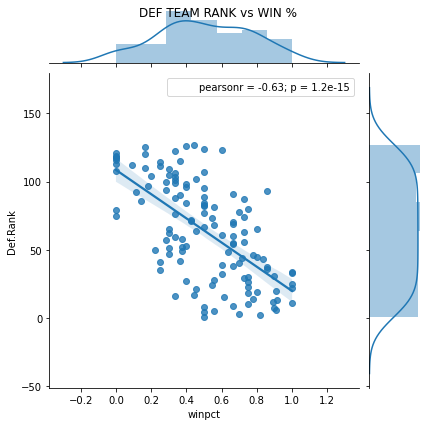

In [9]:
g=sns.jointplot('winpct','Def.Rank',df,kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('DEF TEAM RANK vs WIN %')
plt.show()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


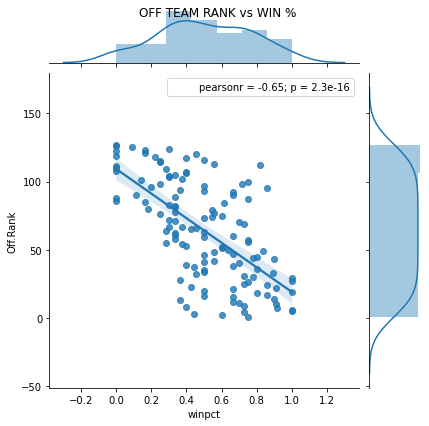

In [10]:
#Regression graph for Offensive Rank and Defensive Rank Vs Win Pct with correlation

#Results show a stronger correlation between Defensive Rank and Win Pct

g=sns.jointplot('winpct','Off.Rank',df, kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('OFF TEAM RANK vs WIN %')
plt.show()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


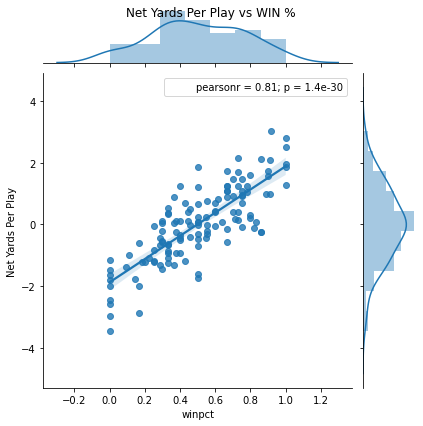

In [11]:
#Regression graph for NYPP Vs Win Pct with correlation

#Results show a stronger correlation between NYPP and Winpct

g=sns.jointplot('winpct','Net Yards Per Play',df, kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('Net Yards Per Play vs WIN %')
plt.show()

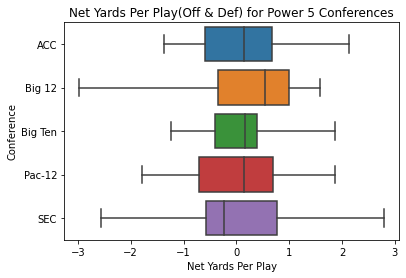

,TS_ID,Team,Season,winpct,Net Yards Per Play
534,860,BYU,2020,0.916667,3.04
878,846,Alabama,2020,1.000000,2.79
81,864,Cincinnati,2020,1.000000,2.50
198,913,North Carolina,2020,0.727273,2.14
627,859,Buffalo,2020,0.857143,2.13
191,865,Clemson,2020,0.909091,2.09
656,931,San Jose St.,2020,1.000000,1.96
769,849,Arizona St.,2020,0.500000,1.87
390,919,Ohio St.,2020,1.000000,1.86
635,968,Western Mich.,2020,0.666667,1.74


In [12]:
filter=df['Conference']== 'ACC'
filter2=df['Conference']== 'SEC'
filter3=df['Conference']== 'Big 12'
filter4=df['Conference']== 'Big Ten' 
filter5=df['Conference']== 'Pac-12'
dfn=df.where(filter | filter2 | filter3 | filter4 | filter5)
sns.boxplot(dfn['Net Yards Per Play'], dfn['Conference'], whis=np.inf)
plt.title('Net Yards Per Play(Off & Def) for Power 5 Conferences')
plt.show()
df[['TS_ID' , 'Team', 'Season', 'winpct', 'Net Yards Per Play']].sort_values('Net Yards Per Play', ascending = False)[0:25]

In [13]:
# Bottom 10 in Avg Rank
df[['Team', 'Season','Off.Rank','Def.Rank','Avg Rank']].sort_values('Avg Rank')[-10:]

,Team,Season,Off.Rank,Def.Rank,Avg Rank
381,Illinois,2020,98,114,106.0
657,UNLV,2020,108,119,113.5
626,Bowling Green,2020,111,117,114.0
624,Akron,2020,121,110,115.5
891,Vanderbilt,2020,110,121,115.5
969,ULM,2020,119,113,116.0
277,Kansas,2020,126,108,117.0
201,Syracuse,2020,125,112,118.5
658,Utah St.,2020,123,120,121.5
536,Massachusetts,2020,127,118,122.5


In [14]:
# Bottom 10 in NYPP. THEY STINK COACH!

# Bottom 10 in Avg Rank
df[['Team', 'Season', 'Win', 'Loss','Net Yards Per Play']].sort_values('Net Yards Per Play', ascending=False)[-10:]

,Team,Season,Win,Loss,Net Yards Per Play
884,LSU,2020,5,5,-1.74
88,Temple,2020,1,6,-1.76
768,Arizona,2020,0,5,-1.79
658,Utah St.,2020,1,5,-1.99
969,ULM,2020,0,10,-2.01
657,UNLV,2020,0,6,-2.44
891,Vanderbilt,2020,0,9,-2.57
624,Akron,2020,1,5,-2.87
277,Kansas,2020,0,9,-2.97
536,Massachusetts,2020,0,4,-3.45


In [15]:
#Kick out the Df for visualization in Tableau
df.to_csv("2020TableauCFB.csv")